In [34]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.0


In [35]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

[5 0 4 1 9 2 1 3 1 4]


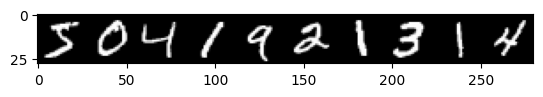

In [36]:
import matplotlib.pyplot as plt
import numpy as np
img = np.hstack(x_train[:10])
plt.imshow(img, cmap='gray')
print(y_train[:10])

In [37]:
#데이터 개수 확인
len(y_train),len(y_test) ,np.unique(y_train, return_counts=True)

(60000,
 10000,
 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
  array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])))

In [38]:
#추가코드  28행,28열의 흑백이미지 60000장
np.shape(x_train) , np.shape(x_test)

((60000, 28, 28), (10000, 28, 28))

In [39]:
## x,y 데이터 훈련, 테스트로 나누어진 데이터를 array로 받음
## 사진데이터를 로드, 사이즈를 통일, 어레이로 하고, 레이블 변환 x
## 지도학습, 사진을 넣으면 0,1,2,3,4,5,6,7,8,9 의 10개중 어떤 카테고리인가를 맞추는 다항분류 문제
## 이 다항문제는 무조건 원핫인코딩 되어있거나
## 아니면 모델에서 원핫인코딩 시켜야함
## 원핫인코딩은  0은[1,0,0,0,0,0,0,0,0,0]
##               9는[0,0,0,0,0,0,0,0,0,1]

In [40]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  # dense는 바로위의 레이어에서 활성화 함수에 의해서 계산된 output 갑이기도 하고, 다음레이어로 들어가는 input x값이기도함
  # x값은 100개
  tf.keras.layers.Dense(100, activation='relu'), # w(100)+b(1) rlqhs 101개
  tf.keras.layers.Dropout(0.2), # 과적합없애기 w값을 20%정도 0으로 변경
  tf.keras.layers.Dense(10, activation='softmax') #softmax는 다항분류 계산식(활성화 함수)
])

#softmax는 ctegorical_crossentropy 인데
# y입력값이 원핫인코딩 안되어 있으면 sparse_categorical_crossentropy 라고 지정하면 알아서 원핫인코딩함
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.weights

In [41]:
hist=model.fit(x_train,y_train, epochs=30,
          validation_data=(x_train,y_train), batch_size=100)

Epoch 1/30
600/600 [==============================] - 5s 8ms/step - loss: 0.4052 - accuracy: 0.8840 - val_loss: 0.2018 - val_accuracy: 0.9425
Epoch 2/30
600/600 [==============================] - 5s 9ms/step - loss: 0.2051 - accuracy: 0.9412 - val_loss: 0.1405 - val_accuracy: 0.9601
Epoch 3/30
600/600 [==============================] - 4s 7ms/step - loss: 0.1576 - accuracy: 0.9542 - val_loss: 0.1054 - val_accuracy: 0.9696
Epoch 4/30
600/600 [==============================] - 4s 7ms/step - loss: 0.1303 - accuracy: 0.9623 - val_loss: 0.0857 - val_accuracy: 0.9759
Epoch 5/30
600/600 [==============================] - 5s 8ms/step - loss: 0.1108 - accuracy: 0.9675 - val_loss: 0.0693 - val_accuracy: 0.9796
Epoch 6/30
600/600 [==============================] - 4s 7ms/step - loss: 0.0984 - accuracy: 0.9701 - val_loss: 0.0611 - val_accuracy: 0.9824
Epoch 7/30
600/600 [==============================] - 4s 6ms/step - loss: 0.0899 - accuracy: 0.9732 - val_loss: 0.0511 - val_accuracy: 0.9851
Epoch 

In [42]:
hist.history

{'loss': [0.40523701906204224,
  0.20509736239910126,
  0.15760333836078644,
  0.13030050694942474,
  0.11079674959182739,
  0.09835858643054962,
  0.08987656980752945,
  0.0815228521823883,
  0.07456492632627487,
  0.06795955449342728,
  0.06272687762975693,
  0.0587303452193737,
  0.05574282631278038,
  0.051653340458869934,
  0.048175085335969925,
  0.04579811170697212,
  0.045824091881513596,
  0.042218104004859924,
  0.03995700553059578,
  0.03741803392767906,
  0.037315428256988525,
  0.03628934547305107,
  0.03373972699046135,
  0.03308457136154175,
  0.03205640986561775,
  0.030023973435163498,
  0.030506491661071777,
  0.028570501133799553,
  0.027124367654323578,
  0.025501998141407967],
 'accuracy': [0.8840000033378601,
  0.9411666393280029,
  0.9542333483695984,
  0.9623000025749207,
  0.9674500226974487,
  0.9700833559036255,
  0.9732166528701782,
  0.9752166867256165,
  0.9769999980926514,
  0.9786333441734314,
  0.9801333546638489,
  0.9810333251953125,
  0.9823499917984

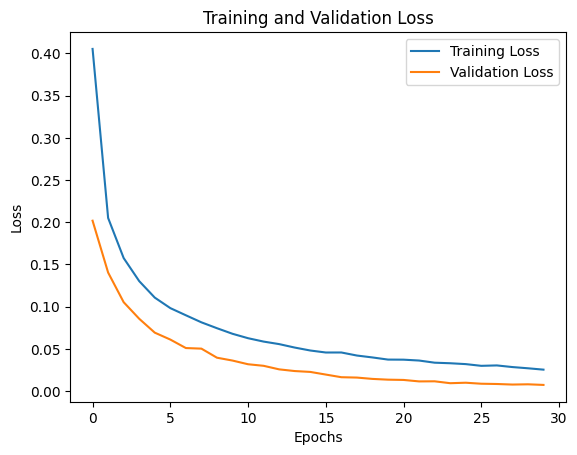

In [43]:
# 훈련 손실과 검증손실
import matplotlib.pyplot as plt

# 학습 과정 시각화
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


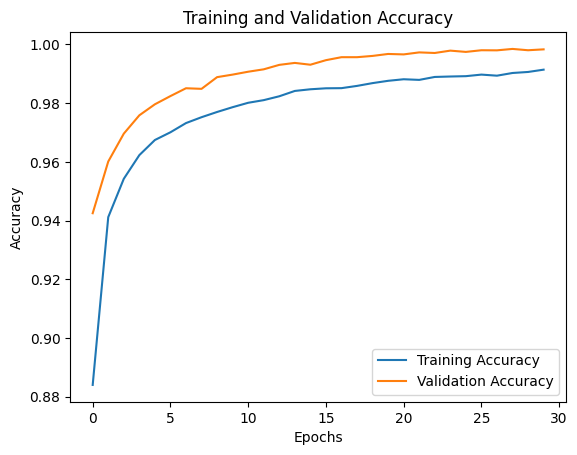

In [44]:
#훈련 정확도와 검증 정확도
import matplotlib.pyplot as plt

# 학습 과정 시각화
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [45]:
# 모델 저장
model.save_weights('my_model_weights.h5')